In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg


# CFL = 3/4:

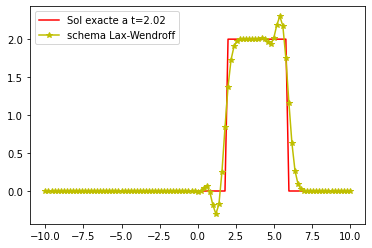

L'erreur pour le schema Lax-Wendroff: 1.8565701482427859


In [33]:
# La vitesse:
a = 2
# Les extremites:
l = -10
L = 10
# Le temps final:
T=2
# La descitisation du domaine:
N = 101
dx = (L-l)/(N-1)
X = np.linspace(l,L,N)
# CFL:
CFL=0.75
dt=CFL*dx/a


# La solution initiale:

def u0(x):
    if  x>=-2 and x <= 2:
        return 2
    else: return 0

# Le flux Exacte:
def F(u):
    return a*u



    
def LW(ug,ud):
    return 0.5*(F(ug)+F(ud)-(dt/dx)*(a**2)*(ud-ug))
       
    
U0=np.array([u0(x) for x in X])



Un_LW = U0.copy()
Unp1_LW = np.zeros(N)

 


j=0
temps = 0
while temps <= T:
    ############################################################################################
    ############################### Shema De Lax_Wendroff ####################################
    ############################################################################################
    for i in range(1,N-1):
        Fd=LW(Un_LW[i],Un_LW[i+1])
        Fg=LW(Un_LW[i-1],Un_LW[i])  
        Unp1_LW[i]=Un_LW[i]-dt/dx*(Fd-Fg)
        
    Unp1_LW[0] = Unp1_LW[1]
    Unp1_LW[N-1] = Unp1_LW[N-2]
    
    
    Un_LW = Unp1_LW.copy()
    
    
    ############################################################################################
    #################################### Solution Exacte #######################################
    ############################################################################################
    Uexact = np.zeros(N)
    for i in range(N):
        Uexact[i] = u0(X[i] - a * temps)
       
    temps = temps + dt
    
plt.plot(X, Uexact, '-r', label=f'Sol exacte a t={temps:.2f}')
plt.plot(X, Un_LW, '*-y', label='schema Lax-Wendroff')

plt.legend()
plt.pause(0.1)   

e_LW =  np.linalg.norm(Uexact - Un_LW,ord = 2) 

print(f"L'erreur pour le schema Lax-Wendroff: {e_LW}")


# CFL = 1:

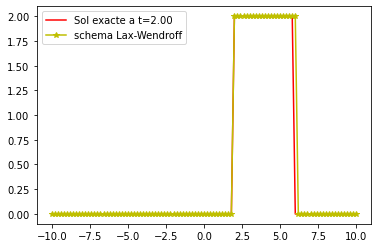

L'erreur pour le schema Lax-Wendroff: 2.0


In [34]:

CFL=1
dt=CFL*dx/a


# La solution initiale:


U0=np.array([u0(x) for x in X])



Un_LW = U0.copy()
Unp1_LW = np.zeros(N)

 


j=0
temps = 0
while temps <= T:
    ############################################################################################
    ############################### Shema De Lax_Wendroff ####################################
    ############################################################################################
    for i in range(1,N-1):
        Fd=LW(Un_LW[i],Un_LW[i+1])
        Fg=LW(Un_LW[i-1],Un_LW[i])  
        Unp1_LW[i]=Un_LW[i]-dt/dx*(Fd-Fg)
        
    Unp1_LW[0] = Unp1_LW[1]
    Unp1_LW[N-1] = Unp1_LW[N-2]
    
    
    Un_LW = Unp1_LW.copy()
    
    
    ############################################################################################
    #################################### Solution Exacte #######################################
    ############################################################################################
    Uexact = np.zeros(N)
    for i in range(N):
        Uexact[i] = u0(X[i] - a * temps)
       
    temps = temps + dt
    
plt.plot(X, Uexact, '-r', label=f'Sol exacte a t={temps:.2f}')
plt.plot(X, Un_LW, '*-y', label='schema Lax-Wendroff')

plt.legend()
plt.pause(0.1)   

e_LW =  np.linalg.norm(Uexact - Un_LW,ord = 2) 

print(f"L'erreur pour le schema Lax-Wendroff: {e_LW}")
